In [1]:
library(dplyr)
library(ggplot2)
data(mpg)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [4]:
hwy <- mpg$hwy

paste('El promedio de rendimiento es de:', mean(hwy), 'millas por galón.')
paste('La mediana de rendimiento es de:', median(hwy), 'millas por galón.')

[1] "El promedio de rendimiento es de: 23.4401709401709 millas por galón."

[1] "La mediana de rendimiento es de: 24 millas por galón."

In [5]:
paste('El segundo cuartil de rendimiento es de:', quantile(hwy, 0.25), 'millas por galón.')
paste('El segundo cuartil de rendimiento es de:', quantile(hwy, 0.5), 'millas por galón.')
paste('El segundo cuartil de rendimiento es de:', quantile(hwy, 0.75), 'millas por galón.')

[1] "El segundo cuartil de rendimiento es de: 18 millas por galón."

[1] "El segundo cuartil de rendimiento es de: 24 millas por galón."

[1] "El segundo cuartil de rendimiento es de: 27 millas por galón."

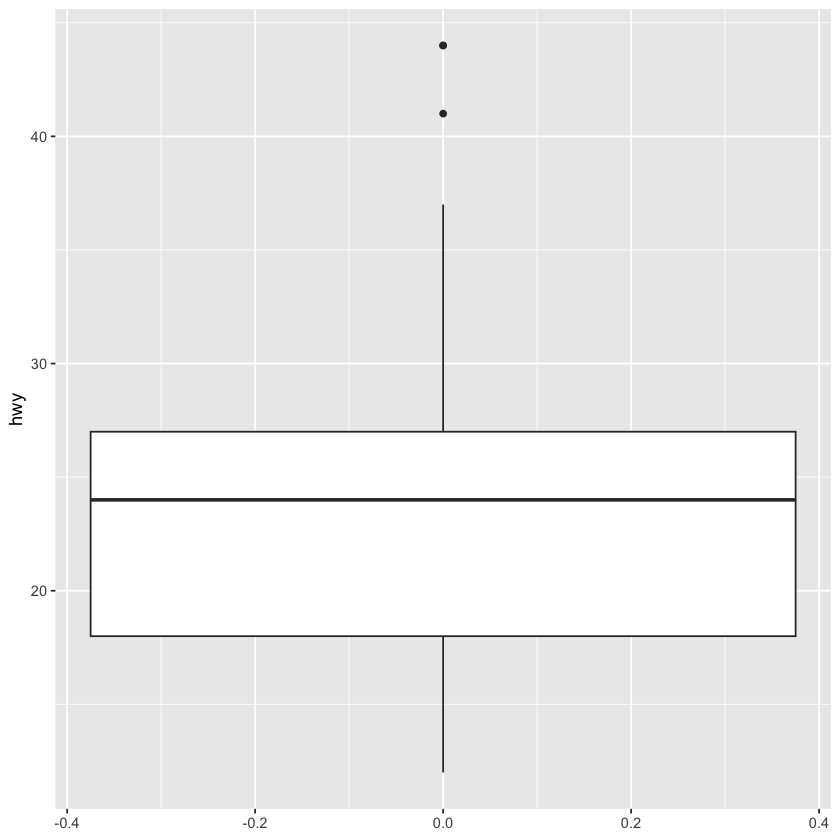

In [7]:
mpg %>% 
    ggplot() +
    aes(y = hwy) +
    geom_boxplot()

In [12]:
# Rango
print(paste('El rango del rendimiento es de', max(hwy) - min(hwy), 'galones por litro'))

# Rango intercuantílico
print(paste(
    'El rango intercuantílicodel rendimiento es de',
    quantile(hwy, 0.75) - quantile(hwy, 0.25),
    'galones por litro'
))
print(paste('El rango intercuantílicodel rendimiento es de', IQR(hwy, 0.25), 'galones por litro'))

[1] "El rango del rendimiento es de 32 galones por litro"
[1] "El rango intercuantílicodel rendimiento es de 9 galones por litro"
[1] "El rango intercuantílicodel rendimiento es de 9 galones por litro"


In [16]:
# Identificando supuestos outliers por criterio de rango intercuantílico

# Outliers superiores
mpg %>% 
    filter(hwy >= quantile(hwy, 0.75) + (1.5 * IQR(hwy)))

# Outliers inferiores
mpg %>% 
    filter(hwy <= quantile(hwy, 0.25) - (1.5 * IQR(hwy)))

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact
volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact
volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>


In [19]:
#Desviación estándar

print(paste('La desviación estandar del rendimiento de los autos es de ', round(sd(hwy), 5), 'millas pr galón'))

[1] "La desviación estandar del rendimiento de los autos es de  5.95464 millas pr galón"


In [21]:
parra <- c(0,2)
length(parra)
mean(parra)
sd(parra)

[1] 2

[1] 1

[1] 1.414214

In [22]:
# Coeficiente de variación

sd(hwy) / mean(hwy)

[1] 0.2540358

`geom_smooth()` using formula = 'y ~ x'


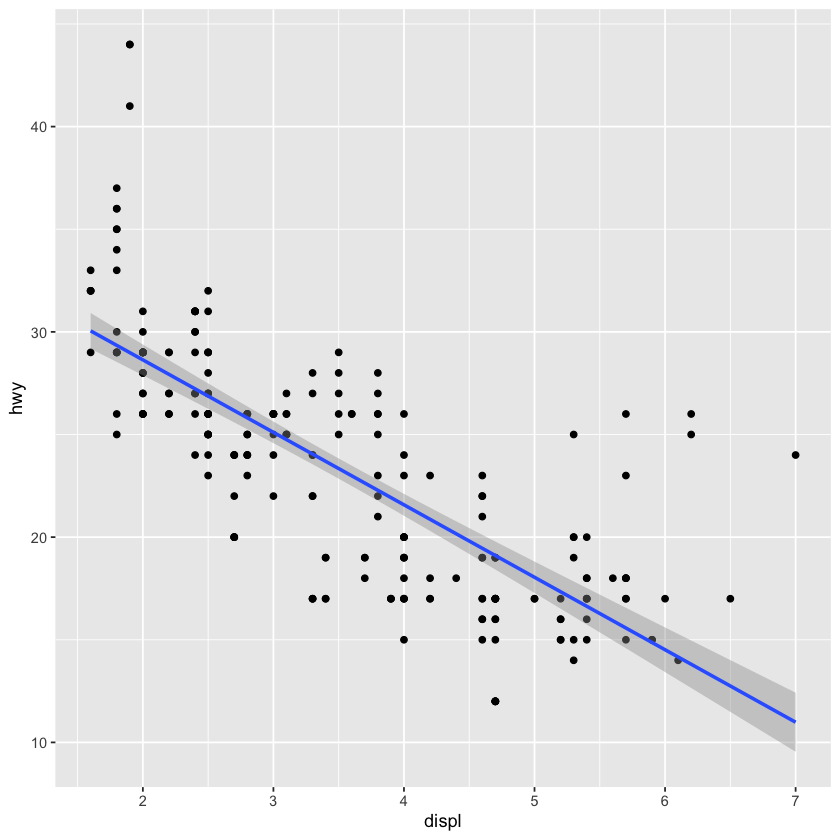

In [25]:
mpg %>% 
    ggplot() +
    aes(x = displ, y = hwy) +
    geom_point() +
    geom_smooth(method = 'lm')

In [29]:
# cor entrega un coeficiente de correlación.
# Por defecto, entrega el coeficiente de corelación de Pearson.
cor(mpg$displ, mpg$hwy)

[1] -0.76602

In [36]:
set.seed(123)
x <- rnorm(100)
e <- rnorm(100, sd = 0.5)

y <- 1 + x**3 + e
A <- data.frame(x = x, y = y)

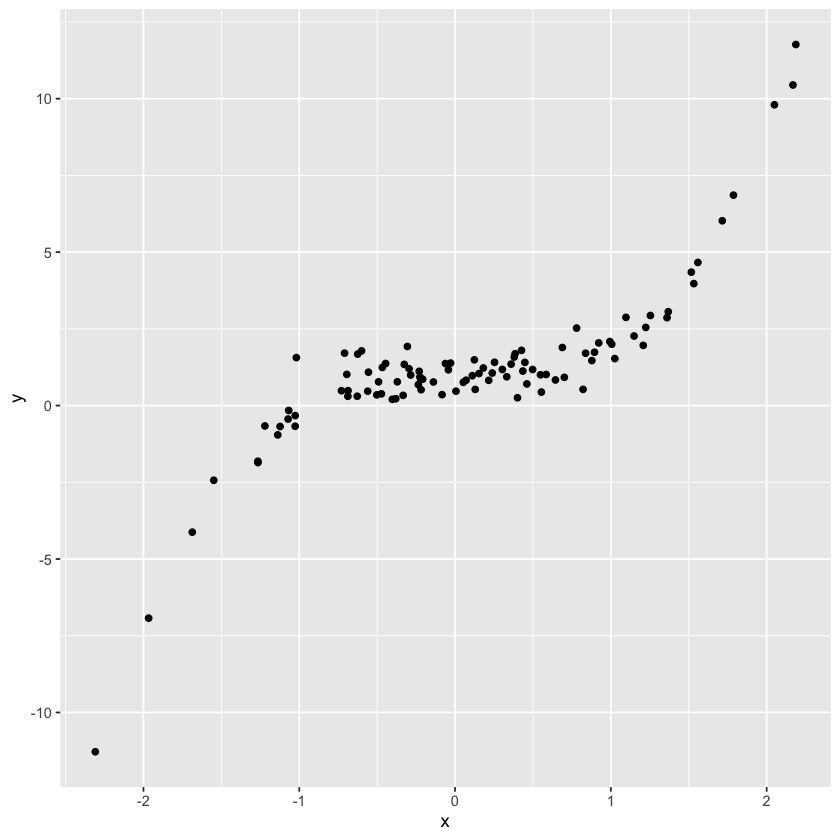

In [37]:
A %>% 
    ggplot() +
    aes(x = x, y = y) +
    geom_point()

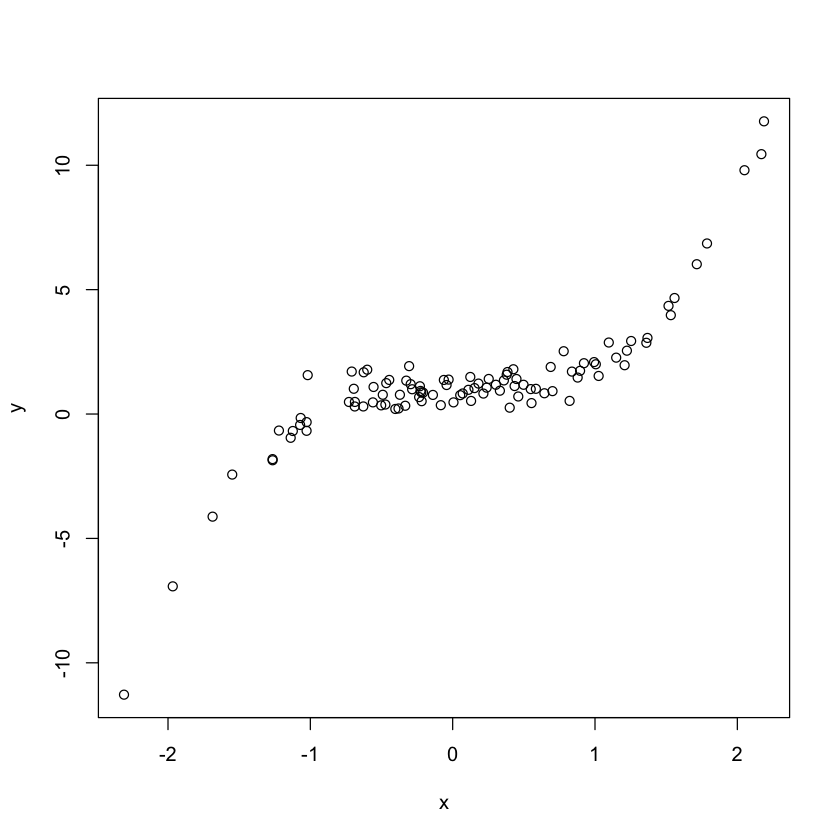

In [39]:
plot(A)

In [38]:
cor(A$x, A$y)
cor(A$x, A$y, method='spearman')

[1] 0.8103716

[1] 0.7645365

In [41]:
install.packages('corrplot')
library(corrplot)


The downloaded binary packages are in
	/var/folders/r2/y9m75_w11cdbjpb1tfp78p3r0000gp/T//RtmpnokI0i/downloaded_packages


corrplot 0.92 loaded



In [49]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [50]:
corrplot(mtcars)

ERROR: Error in corrplot(mtcars): The matrix is not in [-1, 1]!
